In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [39]:
import seaborn as sns

In [4]:
iris=load_iris()

In [6]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [10]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis=1,inplace=True)

In [11]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


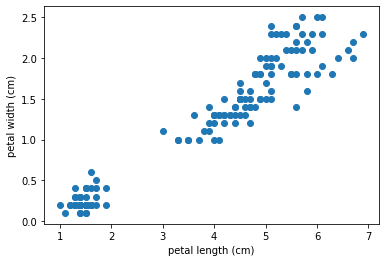

In [15]:
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [21]:
df['petal length (cm)']=scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)' ]=scaler.fit_transform(df[['petal width (cm)']])

In [22]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [24]:
from sklearn.cluster import KMeans

In [30]:
SSE=[]
x=range(1,11)
for k in x:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    SSE.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

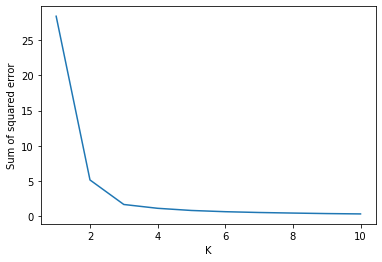

In [32]:
plt.plot(x,SSE)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

In [34]:
km3=KMeans(n_clusters=3)
pred=km3.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [35]:
df['Cluster']=pred

In [36]:
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


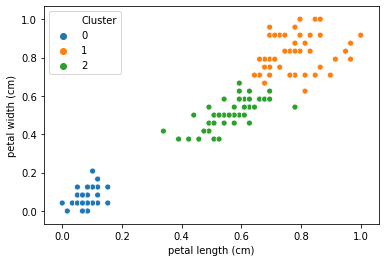

In [45]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df['Cluster'],palette="tab10")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()